In [12]:
##### This code is from Updated Testing Reddit - No Con- bias (Fictitious Play)-01092022
##### This code replace the big real datanetwork with small sythetic network 
import scipy
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations
import time
import random
from scipy.stats import beta
import pandas as pd
import copy
%matplotlib inline
#%run pure_strategy_selection.ipynb  #include simple selection algorithm
import scipy.io
import collections
import sys


## Mathmatic Functions

In [15]:
# centers the opinion vector around 0\n",
def mean_center(op, n):
    ones = np.ones((n, 1))
    x = op - (np.dot(np.transpose(op),ones)/n) * ones
    return x
    
# compute number of edges, m\n
def num_edges(L, n):
    m = 0
    for i in range(n):
        for j in range(n):
            if i > j and L[i,j] < 0:
                m += 1            
    return m

# maximizing polarization only: \\bar{z}^T \\bar{z}   
def obj_polarization(A, L, op, n):
    op_mean = mean_center(op, n)
    z_mean = np.dot(A, op_mean) 
    return np.dot(np.transpose(z_mean), z_mean)[0,0] 

def obj_polarization_1(A, L, op, n):
    z = np.dot(A, op) 
    z_mean = mean_center(z, n)
    return np.dot(np.transpose(z_mean), z_mean)[0,0] 

# Calculate innate polarization
def obj_innate_polarization(s, n):  
#     np.set_printoptions(precision=5)
    op_mean = mean_center(s, n)
    return np.dot(np.transpose(op_mean), op_mean)[0,0]

In [17]:
# Parameters for the network

np.set_printoptions(precision=5)

## Creating Network
### 1. Make Random Network

In [64]:
# name = "Karate"
# filename = "%s.ipynb" % name
# print(filename)
# %run filename
#%run sync_net4.ipynb
#%run Karate.ipynb
#%run Twitter.ipynb
%run Reddit.ipynb
#n=20
#%run Synthetic.ipynb

File path: C:\Users\xz47\OneDrive\Misinfo Paper\One Node - Final\12092023_PoGame\12092023_PoGame\data\Reddit.mat


553


ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

<Figure size 2000x2000 with 0 Axes>

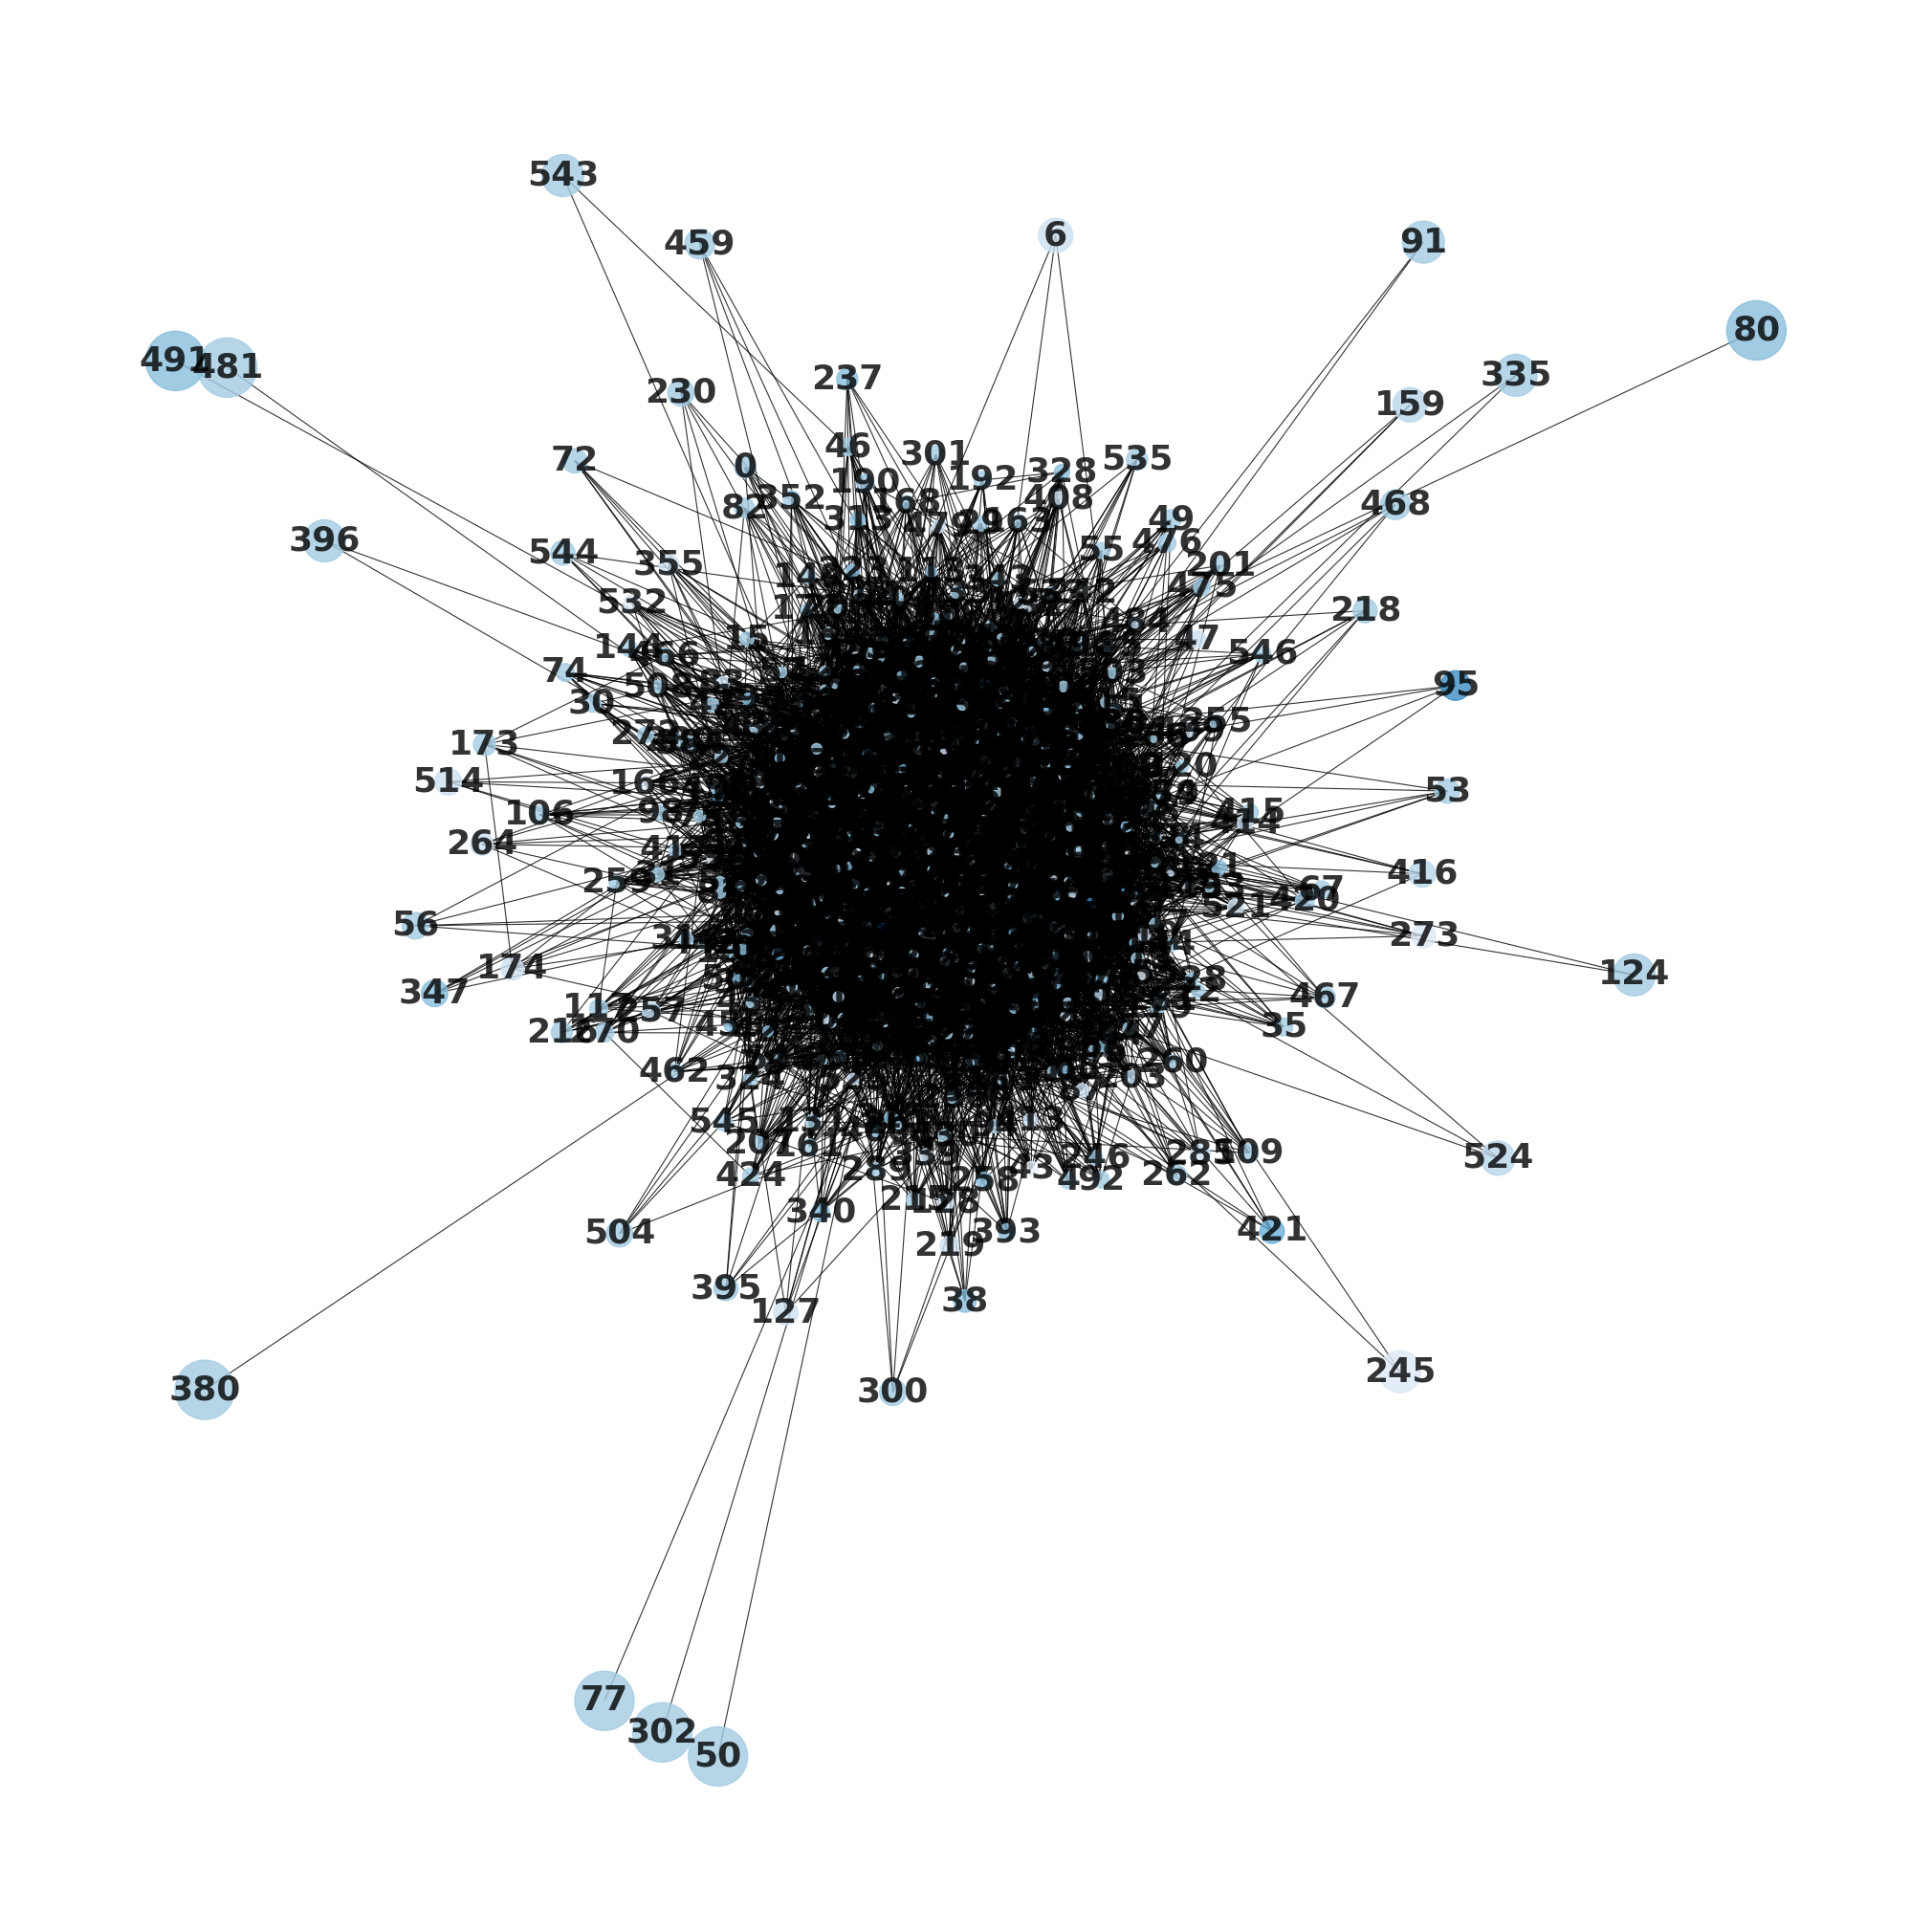

In [66]:
# what the twitter graph looks like 
s_use = s.flatten()   # Convert array to a list for later operation
s_use = s_use.tolist()
new_s = [i * 30 for i in s_use]
df = pd.DataFrame(new_s, columns=['Opinion']) #create a datafram with index at column 1, opinion at column 2

nxG = nx.from_numpy_array(G)   
# nxG = nx.relabel_nodes(nxG, mapping)      
plt.figure(figsize=(20, 20))


def node_edge(G, n):
    edges =[]
    for v in range(n):
        a = np.array(np.nonzero(G[v])[0])
        edge = len(a)
#         print(edge)
        edges.append(edge)
        
    return edges

node_edges = node_edge(G, n)
# print(node_edges)

node_sizes =[]
for i in node_edges:
    node_size = 1/i*2000
    node_sizes.append(node_size)

min_equi = []
max_equi = []
# Create node color
color_map = []
for node in nxG:
    if node in min_equi:
        color_map.append('orange')
    elif node in max_equi:
        color_map.append('red')
    else:
        color_map.append('grey')
# print(node_sizes)

######################### Calculate Key Values & Visualization #######################################3
L = scipy.sparse.csgraph.laplacian(G, normed=False)  # Return the Laplacian matrix
A = np.linalg.inv(np.identity(n) + L)  # A = (I + L)^(-1)\n  Stanford paper theory
m = num_edges(L, n)                    # call the function to calculate the number of edges
columnsum_ij = np.sum(A, axis=0)
#print(columnsum_ij)
print(n)
# what the twitter graph looks like 
nxG = nx.from_numpy_array(G)          
plt.figure(figsize=(20, 20))

# Fix seed - fix network shape
my_pos = nx.spring_layout(nxG, seed = 2)
nx.draw(nxG, pos= my_pos, with_labels= True, node_color=df['Opinion'].astype(int),cmap=plt.cm.Blues, node_size= node_sizes, edge_color='black', width=0.8, font_color='black',font_size=26, font_weight='bold', alpha=0.8)
#nx.draw(nxG, pos = my_pos, with_labels=False, node_color=color_map, node_size= node_sizes, edge_color='grey', width=0.5, font_color='white',font_size=9, font_weight='bold')
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin = 0, vmax=1))
cbar = plt.colorbar(sm, shrink = 0.5)
tick_font_size = 24
cbar.ax.tick_params(labelsize=tick_font_size)
plt.show()

# if we want to customize the color bar range to min/max s
# vmin = min(s)
# vmax = max(s)
# sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin = vmin, vmax=vmax))
# sm._A = []
# plt.colorbar(sm,shrink=0.5)
# plt.show()

### Min [245, ] [284, ]       Max [50, ] [481, ] 

## Network Analysis

In [24]:
# Checking Selected node proprties, no need to run for simulation.

def node_edge(G, n):
    edges =[]
    for v in range(n):
        a = np.array(np.nonzero(G[v])[0])
        edge = len(a)
#         print(edge)
        edges.append(edge)
        
    return edges

edges = node_edge(G, n)
print('Edge Properties')
print('Max:'+ str(np.max(edges)))
print('Mean: ' + str(np.mean(edges)))
print('Min: ' + str(np.min(edges)))

min_equi = [245,284]
max_equi = [50,481]


print('Min Choice')
print('11'+ str(s[11]))
print(np.nonzero(G[11]))
# print('   edge:'+ str(edges[199]))

print('16'+ str(s[16]))
print(np.nonzero(G[16]))
# print('   edge:'+ str(edges[37]))


print('12'+ str(s[12]))
print(np.nonzero(G[12]))
# print('   edge:'+ str(edges[529]))

print('Max Choice')
print('15'+ str(s[15]))
print(np.nonzero(G[15]))
# print('   edge:'+ str(edges[202]))


Edge Properties
Max:17
Mean: 4.588235294117647
Min: 1
Min Choice
11[0.77041]
(array([0], dtype=int64),)
16[0.51203]
(array([5, 6], dtype=int64),)
12[0.64012]
(array([0, 3], dtype=int64),)
Max Choice
15[0.4228]
(array([32, 33], dtype=int64),)


In [26]:
print("___________________Min Analyze__________________________________________")
print(np.argmax(s))
print(np.argmin(s))

s_aa = s[:, 0]
my_dict = {index: value for index, value in enumerate(s_aa)}
sorting_s = sorted(my_dict.items(), key=lambda x:x[1])
sorted_S = dict(sorting_s)
print(sorted_S)
search_key = 86

temp = list(sorted_S.items()) 
res = [idx for idx, key in enumerate(temp) if key[0]==search_key]
# printing result 
print("Opinion rank of this agent is : " + str(res))


___________________Min Analyze__________________________________________
11
29
{29: 0.2065732769497216, 20: 0.2378355132396121, 27: 0.2457746750273635, 3: 0.25481067581322, 22: 0.2563547092455989, 2: 0.2569361098653809, 23: 0.2708565670154095, 33: 0.2916447236743404, 9: 0.292990277226838, 0: 0.3329855890252891, 28: 0.3401210877868077, 18: 0.3518122646975705, 19: 0.3657317039639005, 30: 0.3843924362005658, 4: 0.4010312931106546, 13: 0.4016676996257509, 25: 0.4227628714480405, 15: 0.4228007697613097, 10: 0.4374543270176704, 26: 0.4449042104919422, 32: 0.4877651933335371, 31: 0.4967505699320694, 16: 0.5120312044870241, 21: 0.5592090235429361, 12: 0.640120610637489, 5: 0.6946240837167924, 8: 0.7067782468063173, 6: 0.720404905537744, 1: 0.7292162342929378, 24: 0.7375304885380007, 7: 0.7377757624061752, 17: 0.7550029202077742, 14: 0.763982714954492, 11: 0.7704062562620455}
Opinion rank of this agent is : []


In [28]:
print(s[11])
print(s[16])
print(s[6])
print(s[29])

[0.77041]
[0.51203]
[0.7204]
[0.20657]


In [30]:
agent=40

In [32]:
print("___________________Max Analyze__________________________________________")
nxG = nx.from_numpy_matrix(G) 
# G = nx.karate_club_graph()
print("_______________Degree Centrality_____________________________")  
plt.figure(figsize =(15, 15))
deg_centrality = nx.degree_centrality(nxG)
sortedDict = sorted(deg_centrality.items(), key=lambda x:x[1])
converted_dict = dict(sortedDict)
print(converted_dict)
print("                           ")
print("_______________Closeness Rank_____________________________")
close_centrality = nx.closeness_centrality(nxG)
sortedDict1 = sorted(close_centrality.items(), key=lambda x:x[1])
converted_dict1 = dict(sortedDict1)
print(converted_dict1)
print("                           ")
print("_______________Page Rank_____________________________")
pr = nx.eigenvector_centrality(nxG)
sortedDict3 = sorted(pr.items(), key=lambda x:x[1])
converted_dict3 = dict(sortedDict3)
print(converted_dict3)

print("                           ")

def gap(op, n):
    ones = np.ones((n, 1))
    x = op - (np.dot(np.transpose(op),ones)/n) * ones
    return abs(x)

gap = gap(s,n)
my_gap = {index: value for index, value in enumerate(gap)}
sorting_gap = sorted(my_gap.items(), key=lambda x:x[1])
sorted_gap = dict(sorting_gap)
print(sorted_gap)



___________________Max Analyze__________________________________________


AttributeError: module 'networkx' has no attribute 'from_numpy_matrix'

### 4. Equilibrium & Polarization  - based on derivation
$$P(z) = z ^T * z $$


In [68]:

## s =  make_innat_opinions(n, c1)
# print('Innate Opinion')
# print(s)
# print('Equilibrium Opinion')
# print(np.dot(A, s))

op = s
y = mean_center(s,n)
# print(y)
innat_pol = np.dot(np.transpose(y), y)[0,0] 
print('Innate_polarization:')
print(innat_pol)

# Test equilibrium polarization
equ_pol = obj_polarization(A, L, s, n)
print('Equi_polarization:')
print(equ_pol)

di = equ_pol-innat_pol
print("Difference:")
print(di)

Innate_polarization:
0.9625703647920434
Equi_polarization:
0.005278437803904967
Difference:
-0.9572919269881384


In [37]:
payoff_matrix = [np.empty((0, 2*n), float)]
print(payoff_matrix)
print(np.zeros(2*n).shape)

[array([], shape=(0, 68), dtype=float64)]
(68,)


### Testing players' behavior

In [41]:

def MinMax_play(s,n):    # maxmizer first-time play, greedy algorithm
    print('Minimizer Play')
   
    (v1, min_opinion, min_pol, max_action) = choose_min_vertex(s, n) # The best choice among all opinions and vertexs, function is in "pure_strategy_selection.ipynb"
    (v2, max_opinion) = max_action
    if v1 == None:   # if maximizer cannot find one
        print('Maximizer fail')

    else:
        print("                                ")
        print("Maximizer finds its target agent:")
#         print('v1', 'changed_opinion', 'innate_obj', 'obj')
#         print(max_champion)

        #Store innate_op of the max_selected vertex
        old_opinion_min = s[v1, 0]
        old_opinion_max = s[v2, 0]
        ##### change the agent's opinion with best action(agent v1, max_op)

        ## check if agent's opinionis is changed or not
        print("Max Action:    "+"Agent" + str(v2) +" 's opinion " + str(old_opinion_max) + " changed to "+ str(max_opinion))
        print("Min Action:    "+"Agent" + str(v1) +" 's opinion " + str(old_opinion_min) + " changed to "+ str(min_opinion))
        print("Network reaches equilibrium Polarization: " + str(min_pol))


    return(v1, v2, min_opinion, min_pol)

In [43]:
# determine which agent maximizer should select to maximizer the equilibrium polarization
def choose_min_vertex(s, n):
   # max_por = obj_polarization(A, L, op, n)  # use "innate"(after min action) polarization as a comparable standard to find max_por
    min_por = 10000
    C1 = list(range(n))    # for all agent 
    for v1 in C1:         
            print('Minimizer start from agent'+str(v1))
            print("__________________________________")
            (min_opinion, por, max_action) = get_min_opinion(s, n, v1)
 
            if por < min_por: # if the polarization of most recent action > maximum polarization of previous actions
                min_por = por
                champion = (v1, min_opinion,min_por, max_action)   # save the this action as champion    
    print("Min champion", champion)
    return (champion)


In [45]:
def find_search_center(por_arr, ith):
    mylist = sorted(por_arr)
    Snd_por = mylist[ith-1]

    search_center = por_arr.index(Snd_por)
    return (search_center)
# determines if value of opinion at v should be set to 0 or 1 to maximize equilibrium polarization 
def get_min_opinion(s, n, v1):
    
    por_arr = [] #np.zeros(11)  # create a two_element array to store polarization value of each option
    #min_opi_option = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] #Min has 10 options to change agent v2's opinion
    min_opi_option = np.arange(0,1.05,0.05)
    min_pol = 1000 # set a big standarlization
    CK_RANK = 2
    t = 0
    min_por = 1000
    max_champion = (None, None)
    while t<5:

        t +=1
#         print(str(t)+"_________________________________")
#         print("min_opi_option:",min_opi_option)
        por_arr = [] #np.zeros(11)  # create a two_element array to store polarization value of each option

        for min_opinion in min_opi_option:
#             print(v1,min_opinion)
            (v2,max_opinion, pol) = minmax_polar(s,v1,min_opinion)
            por_arr.append(pol)
            #print("max_pol: ", max_pol)
            if  pol < min_por:
                min_por = pol
                max_champion = (v2,max_opinion)
                min_op = min_opinion
                print(max_champion)
            minimize_por = min(por_arr)
            minmize_op = min_opi_option[np.argmin(por_arr)]  # the index of maximum polarization = max_opinion --[0,1]

#         print("Max_champion:",max_champion)   
#         print("Min choice:", por_arr)
        
        if t == 1:
            Original_min_por = minimize_por
            ith = CK_RANK # after finding the min discret min_op, search near to the 2nd min_op
        elif t>1:
            ith = 1  #search minimum near to the ith min por
#             if Original_min_por<= minimize_por:        
#     #             print("Original_min_por,min_por,:", )
#                 print("1st discrete min is Optimal:", Original_min_por, min_por)#, Origin, min_por:", Original_min_por, min_por)
#             else:   
#                 print("1st discrete min NOT optimal, Original_min_por,min_por:",Original_min_por, min_por)
        search_center = find_search_center(por_arr, ith)
        low_op = min_opi_option[min(abs(search_center-1),search_center)] #Avoid if 2nd minimum at the edge
        up_op = min_opi_option[min(search_center+1, len(por_arr)-1)] 
#         print("SERACH BOUND:",low_op,up_op)
        min_opi_option = np.linspace(low_op,up_op,10)        
        continue 
        
    print("Max_champion:",max_champion)
    print("Min_champion:", (v1, min_op))
    
    return (min_op, min_por, max_champion)

In [47]:
v1 = 6
get_min_opinion(s, n, v1)

NameError: name 'minmax_polar' is not defined

In [49]:
def minmax_polar(s, v1, min_opinion):
    op = copy.copy(s)
    op[v1] = min_opinion  
    (v2,max_opinion, max_pol) = maximizer_play(op,n,v1)
    
    return (v2,max_opinion, max_pol)
    
    

In [51]:
##### minimizer first-time play, greedy algorithm
def maximizer_play(op,n,min_touched): 
    
    op1 = copy.copy(op)
    max_champion = choose_max_vertex(op1, n, min_touched) 
    (v2, max_opinion, max_pol) = max_champion
    
    if v2 == None:
        print('Minimizer fail')

    return (v2,max_opinion, max_pol)

### Minimizer Strategy

In [54]:
# Minimizer search: Go through each agent 

def choose_max_vertex(op, n, min_touched):
    # current opinion array that changed by maximizer, "innate" opinion that min start with

    #champion = (None, None, 0, None)  # assume the best action is champion
    max_por = 0
    all = list(range(n))    # for all agent 
    C1 = [x for x in all]  # for the vertice that Maximizer has not touched
    
    for v2 in C1:   
        #print('Max start with agent '+ str(v2) )
        if v2 == min_touched:
            changed_opinion = None
            innate_por = obj_innate_polarization(s, n)
            champion = (v2, changed_opinion, innate_por)
        
        else:
            (changed_opinion, por) = get_max_opinion(op,n,v2)   # find the best new_op option           

            if por > max_por:  # if the recent polarization is smaller than the minimum polarization in the history
                max_por = por                         # update the recent option as champion
                champion = (v2, changed_opinion, max_por)  
#     print("Max champion", champion)
    return (champion)  # find the best minimizer's action after going through every new_op option of every agent


In [56]:
# determines if value of opinion at v should be set to 0 or 1 to maximize equilibrium polarization 
def get_max_opinion(op, n, v2):
    
    por_arr = np.zeros(2)  # create a two_element array to store polarization value of each option
    max_opi_option = [0, 1.0]   # Maximizer has two options to change agent v1's opinion
    op1 = copy.copy(op)
    
    # objective if set opinion to 0, 1.0
    j = 0
    for max_opinion in max_opi_option:
        op1[v2] = max_opinion
#         print("max change opinion:",op1)
        max_pol = obj_polarization(A, L, op1, n)
        por_arr[j] = max_pol
        j = j + 1   # index increase 1, put the polarization in array

    maxmize_op = np.argmax(por_arr)  # the index of maximum polarization = max_opinion --[0,1]
    max_por = np.max(por_arr)        # find the maximum polarization in the record
    
    return (maxmize_op, max_por)

In [58]:
MinMax_play(s,n)

Minimizer Play
Minimizer start from agent0
__________________________________
(16, 1)
Max_champion: (16, 1)
Min_champion: (0, 0.0)
Minimizer start from agent1
__________________________________
(16, 1)
(16, 1)
(16, 1)
(16, 1)
(16, 1)
(16, 1)
(16, 1)
(16, 1)
(16, 1)
(16, 1)
(16, 1)
Max_champion: (16, 1)
Min_champion: (1, 0.1442996494436824)
Minimizer start from agent2
__________________________________
(16, 1)
(16, 1)
(16, 1)
(16, 1)
(16, 1)
(16, 1)
(16, 1)
(16, 1)
(16, 1)
(16, 1)
(16, 1)
(16, 1)
(16, 1)
(16, 1)
(16, 1)
(16, 1)
(16, 1)
(16, 1)
(16, 1)
(16, 1)
(16, 1)
Max_champion: (16, 1)
Min_champion: (2, 1.0)
Minimizer start from agent3
__________________________________
(16, 1)
(16, 1)
(16, 1)
(16, 1)
Max_champion: (16, 1)
Min_champion: (3, 0.012254229538180155)
Minimizer start from agent4
__________________________________
(16, 1)
Max_champion: (16, 1)
Min_champion: (4, 0.0)
Minimizer start from agent5
__________________________________
(11, 1)
(11, 1)
(11, 1)
(11, 1)
(11, 1)
(11, 1

(6, 0.09652491998171012, 0.18328979805915777)

In [30]:
agent = 6
network_anl(s,n,G,agent)

6 opinion: [0.7204]
6 neighbors: (array([ 0,  4,  5, 16], dtype=int64),)
Opinion rank of this agent is : 28
[ 0  4  5 16]
Average opinion of neighbors: 0.48516804258494006
_______________Degree Centrality___________________
rank of this agent is : 20
0.12121212121212122
                           
_______________Closeness Rank________________________
rank of this agent is : 17
0.38372093023255816
                           
_______________Page Rank_____________________________
rank of this agent is : 9
0.07948057788594245
                           
Agent's opinion extremity is ranked as: 8
Agent's min_pref is ranked as: 28


# 5. Innate Op and Game

In [70]:
def make_payoff_row(op1,v2, A, L, n):
    payoff_row = np.zeros(2*n)

    for column in range(2*n):
#         print(column)
        v1 = int(column/2)  #i.e., column 11 is agent 5, opinion 1
        max_opinion = column%2
#         print(v1, max_opinion)
        # update the maximizer's change to the opinion array that has changed by minimizer(op1)
        op2 = copy.copy(op1)
        op2[v1,0] = max_opinion
        # calculate the polarization with both max and min's action
        payoff_row[column] = obj_polarization(A, L, op2, n)
    
    j_1 = 2*v2 + 0
    j_2 = 2*v2 + 1
    O_P = obj_polarization(A, L, s, n)
    payoff_row[j_1] = O_P
    payoff_row[j_2] = O_P
    
    return payoff_row

def make_payoff_matrix(s,n):
    payoff_matrix = np.empty((0, 2*n), float)
    C1 = list(range(n))    # for all agent 
    for v2 in C1:         
            print('Minimizer start from agent'+str(v2))
            min_opi_option = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] #Min has two options to change agent v2's opinion
            for min_op in min_opi_option:
                     op = copy.copy(s)
                     op[v2] = min_op
                     payoff_row = make_payoff_row(op,v2, A, L, n) 
#                      print(payoff_row)
                     payoff_matrix = np.vstack([payoff_matrix, payoff_row])
    return payoff_matrix

## 5A. Payoff Matrix - op dynamic

In [75]:
payoff_matrix = make_payoff_matrix(s,n)
#pd.DataFrame(payoff_matrix).to_csv('Karate Discrete Payoff Matrix.csv')
pd.DataFrame(payoff_matrix).to_csv('Reddit Discrete Payoff Matrix1.csv')
#pd.DataFrame(payoff_matrix).to_csv('Twitter Discrete Payoff Matrix1.csv')



Minimizer start from agent0
Minimizer start from agent1
Minimizer start from agent2
Minimizer start from agent3
Minimizer start from agent4
Minimizer start from agent5
Minimizer start from agent6
Minimizer start from agent7
Minimizer start from agent8
Minimizer start from agent9
Minimizer start from agent10
Minimizer start from agent11
Minimizer start from agent12
Minimizer start from agent13
Minimizer start from agent14
Minimizer start from agent15
Minimizer start from agent16
Minimizer start from agent17
Minimizer start from agent18
Minimizer start from agent19
Minimizer start from agent20
Minimizer start from agent21
Minimizer start from agent22
Minimizer start from agent23
Minimizer start from agent24
Minimizer start from agent25
Minimizer start from agent26
Minimizer start from agent27
Minimizer start from agent28
Minimizer start from agent29
Minimizer start from agent30
Minimizer start from agent31
Minimizer start from agent32
Minimizer start from agent33
Minimizer start from age

In [11]:
### Save simulation result to TXT file

# with open('Result'+str(Network)+'.'+str(Experiment)+'.txt', "a") as f:
# #     print(Experiment_note, file=f)
#     print('Initial Condition -(agent, opinion, pol)', file=f)
#     print('Innate op'+str(s),file=f)
#     print('Adjacency matrix'+ str(G), file=f)
# np.arange(0,1.01,0.01)

## 5B. Payoff Matrix - No Op Dynamic 

In [1]:
def make_payoff_row_noopdy(op1,v2, A, L, n):
    payoff_row = np.zeros(2*n)

    for column in range(2*n):
#         print(column)
        v1 = int(column/2)  #i.e., column 11 is agent 5, opinion 1
        max_opinion = column%2
#         print(v1, max_opinion)
        # update the maximizer's change to the opinion array that has changed by minimizer(op1)
        op2 = copy.copy(op1)
        op2[v1,0] = max_opinion
        # calculate the polarization with both max and min's action
        payoff_row[column] = obj_innate_polarization(op2, n) 
    
    j_1 = 2*v2 + 0
    j_2 = 2*v2 + 1
    O_P = obj_innate_polarization(s, n)
    payoff_row[j_1] = O_P
    payoff_row[j_2] = O_P
    
    return payoff_row

def make_payoff_matrix_noopdy(s,n):
    payoff_matrix = np.empty((0, 2*n), float)
    C1 = list(range(n))    # for all agent 
    for v2 in C1:         
            print('Minimizer start from agent'+str(v2))
            min_opi_option = np.arange(0,1.01,0.01) #Min has two options to change agent v2's opinion
            for min_op in min_opi_option:
                     op = copy.copy(s)
                     op[v2] = min_op
                     payoff_row = make_payoff_row_noopdy(op,v2, A, L, n) 
#                      print(payoff_row)
                     payoff_matrix = np.vstack([payoff_matrix, payoff_row])
    return payoff_matrix

In [10]:
payoff_matrix = make_payoff_matrix_noopdy(s,n)
pd.DataFrame(payoff_matrix).to_csv('Karate NoOpDyn Discrete Payoff Matrix1.csv')
#pd.DataFrame(payoff_matrix).to_csv('Reddit NoOpDyn Discrete Payoff Matrix1.csv')
#pd.DataFrame(payoff_matrix).to_csv('Twitter NoOpDyn Discrete Payoff Matrix1.csv')

